In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

### Randomly generate x from a uniform distribution, then define y relationships (linear, quadratic and log)

In [2]:
# Generating x
x = np.random.uniform(size = 10000, low = -5, high = 5)

# Defining y's from x
lin_y = 5*x
quad_y = x**2
log_y = np.sin(x)*np.log(np.abs(x) + 1)

### Fit linear regressions and neural networks for all three relationships

In [3]:
# Linear models
# Fitting linear models
linear_fit_on_lin_y = LinearRegression().fit(x.reshape(-1, 1), lin_y)
linear_fit_on_quad_y = LinearRegression().fit(x.reshape(-1, 1), quad_y)
linear_fit_on_log_y = LinearRegression().fit(x.reshape(-1, 1), log_y)
# Generating predictions from linear models
linear_fit_on_lin_y_pred = linear_fit_on_lin_y.predict(x.reshape(-1, 1))
linear_fit_on_quad_y_pred = linear_fit_on_quad_y.predict(x.reshape(-1, 1))
linear_fit_on_log_y_pred = linear_fit_on_log_y.predict(x.reshape(-1, 1))

# Neural networks with ReLU, no regularization, 32 hidden units in 1 hidden layer
# Fitting neural networks
nn_fit_on_lin_y = MLPRegressor(hidden_layer_sizes = (32, ), alpha = 0).fit(x.reshape(-1, 1), lin_y)
nn_fit_on_quad_y = MLPRegressor(hidden_layer_sizes = (32, ), alpha = 0).fit(x.reshape(-1, 1), quad_y)
nn_fit_on_log_y = MLPRegressor(hidden_layer_sizes = (32, ), alpha = 0).fit(x.reshape(-1, 1), log_y)
# Generating predictions from neural networks
nn_fit_on_lin_y_pred = nn_fit_on_lin_y.predict(x.reshape(-1, 1))
nn_fit_on_quad_y_pred = nn_fit_on_quad_y.predict(x.reshape(-1, 1))
nn_fit_on_log_y_pred = nn_fit_on_log_y.predict(x.reshape(-1, 1))

### View the model preformances

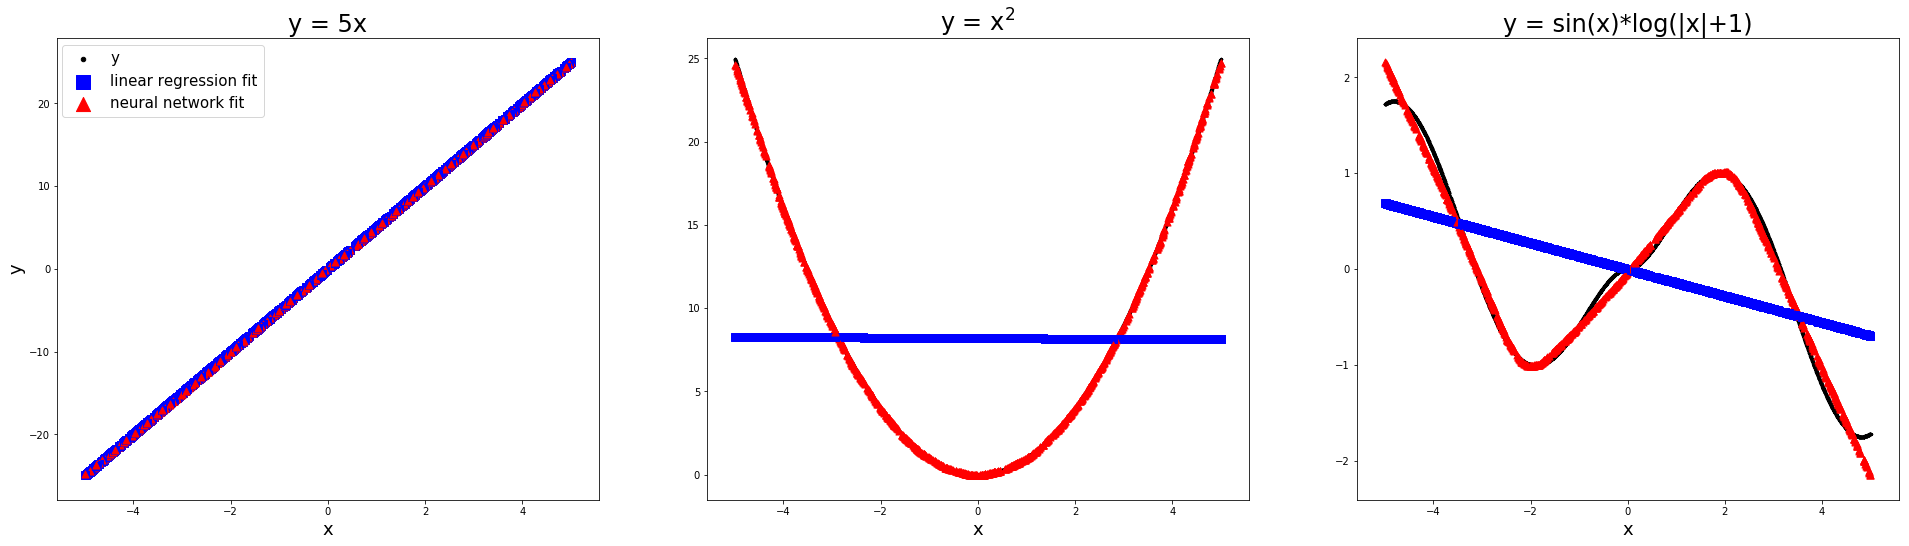

In [4]:
f, axarr = plt.subplots(1,3)
f.set_figheight(8.5)
f.set_figwidth(33)

sampled_indices = np.random.choice(len(x), 1000)

axarr[0].scatter(x = x, y = lin_y, s = 5, color = 'black')
for i in sampled_indices:
    axarr[0].scatter(x = x[i], y = linear_fit_on_lin_y_pred[i], s = 50, color = 'blue', marker = "s")
    axarr[0].scatter(x = x[i], y = nn_fit_on_lin_y_pred[i], s = 50, color = 'red', marker = "^")
axarr[0].set_xlabel('x', fontsize = 18)
axarr[0].set_ylabel('y', fontsize = 18)
axarr[0].set_title('y = 5x', fontsize = 24)
axarr[1].scatter(x = x, y = quad_y, s = 5, color = 'black')
for i in sampled_indices:
    axarr[1].scatter(x = x[i], y = linear_fit_on_quad_y_pred[i], s = 50, color = 'blue', marker = "s")
    axarr[1].scatter(x = x[i], y = nn_fit_on_quad_y_pred[i], s = 50, color = 'red', marker = "^")
axarr[1].set_xlabel('x', fontsize = 18)
axarr[1].set_title('y = x' + r'$^2$', fontsize = 24)
axarr[2].scatter(x = x, y = log_y, s = 5, color = 'black', label = 'y')
for i in sampled_indices:
    if i == sampled_indices[0]:
        axarr[2].scatter(x = x[i], y = linear_fit_on_log_y_pred[i], s = 50, color = 'blue', marker = "s", label = 'linear regression fit')
        axarr[2].scatter(x = x[i], y = nn_fit_on_log_y_pred[i], s = 50, color = 'red', marker = "^", label = 'neural network fit')
    else:
        axarr[2].scatter(x = x[i], y = linear_fit_on_log_y_pred[i], s = 50, color = 'blue', marker = "s")
        axarr[2].scatter(x = x[i], y = nn_fit_on_log_y_pred[i], s = 50, color = 'red', marker = "^")
axarr[2].set_xlabel('x', fontsize = 18)
axarr[2].set_title('y = sin(x)*log(|x|+1)', fontsize = 24)
axarr[2].legend(loc=1, bbox_to_anchor=(-2.005, 1), prop={'size': 15}, markerscale = 2);